In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

!pip install accelerate

!pip install transformers[torch]

!pip install datasets

!pip install -U imbalanced-learn

!pip install torch scikit-learn numpy








     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-lea

In [ ]:
import os
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizer
from transformers import IntervalStrategy
from transformers import TrainingArguments



import torch
from sklearn.utils.class_weight import compute_class_weight


from transformers import Trainer

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import RandomOverSampler
from datasets import load_metric
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import re
from nltk import download
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

import numpy as np
from datasets import load_metric

import nltk
from nltk import ngrams
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [ ]:


url = '/content/drive/MyDrive/Colab Notebooks/Train (1).csv'
url1 = '/content/drive/MyDrive/Colab Notebooks/Test (1).csv'
df = pd.read_csv(url)
df_test = pd.read_csv(url1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [ ]:
df.head(10)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667
6,JDA2QDV5,"Study of more than 95,000 kids finds no link b...",1.0,0.666667
7,S6UKR4OJ,psa: VACCINATE YOUR FUCKING KIDS,1.0,1.000000
8,V6IJATBE,Coughing extra on the shuttle and everyone thi...,1.0,0.666667
9,VB25IDQK,AIDS vaccine created at Oregon Health &amp; Sc...,1.0,0.666667


In [ ]:
df.shape

(10001, 4)

In [ ]:
df.isna().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [ ]:
# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
df.isna().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [ ]:
df

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


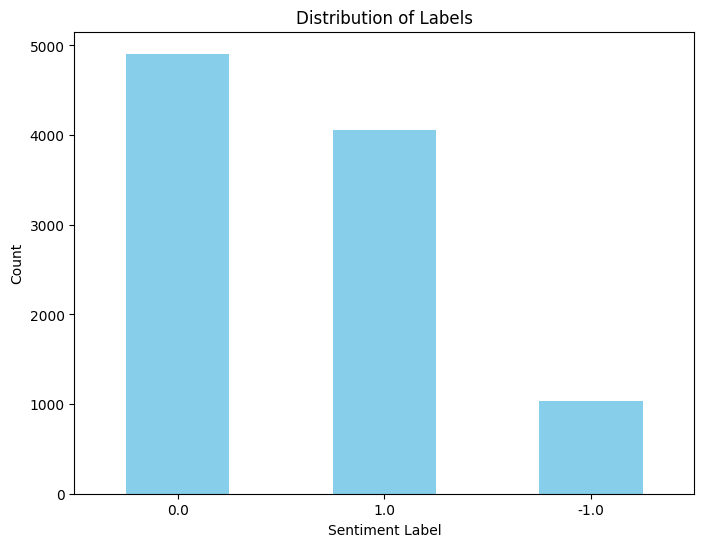

In [ ]:


# Assuming 'df' is your DataFrame containing the data
label_counts = df['label'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8,6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)


 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64


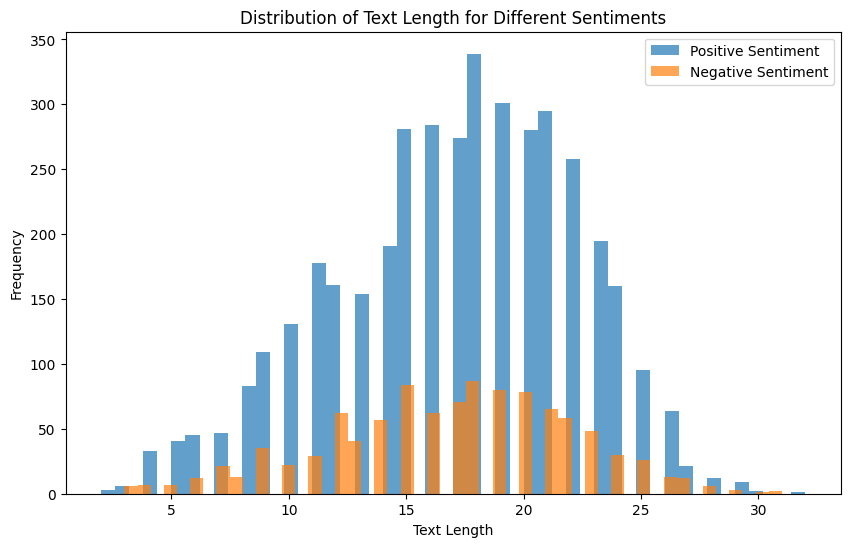

In [ ]:


# Assuming 'df' is your DataFrame containing the data
df['text_length'] = df['safe_text'].apply(lambda x: len(x.split()))

# Separate data based on labels
positive_texts = df[df['label'] == 1.0]['text_length']
negative_texts = df[df['label'] == -1.0]['text_length']

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(positive_texts, bins=50, alpha=0.7, label='Positive Sentiment')
plt.hist(negative_texts, bins=50, alpha=0.7, label='Negative Sentiment')
plt.title('Distribution of Text Length for Different Sentiments')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


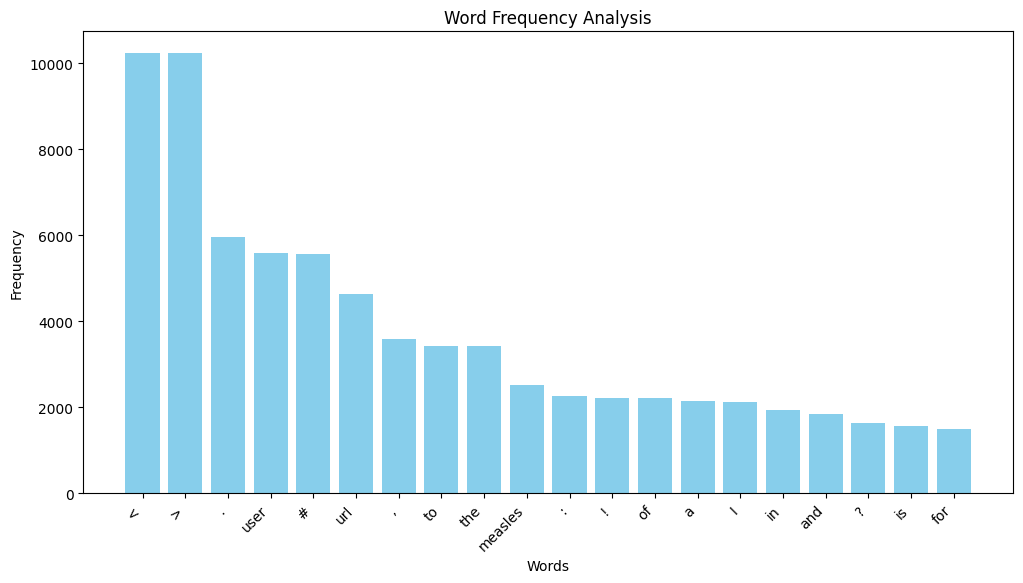

In [ ]:


# Assuming 'df' is your DataFrame containing the data
# Assuming 'safe_text' is the column containing the text data
all_text = ' '.join(df['safe_text'].values.tolist())
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the most common 20 words
most_common_words = word_freq.most_common(20)

# Visualize the most frequent words
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Word Frequency Analysis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:

import nltk
nltk.download('stopwords')


# Define a function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert text to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(item) for item in filtered_tokens]  # Stem the tokens
    return stemmed_tokens

# Apply the preprocess_text function to the 'safe_text' column
df['processed_text'] = df['safe_text'].apply(preprocess_text)

# Display the updated DataFrame
print(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


       tweet_id                                          safe_text  label  \
0      CL1KWCMY  Me &amp; The Big Homie meanboy3000 #MEANBOY #M...    0.0   
1      E3303EME  I'm 100% thinking of devoting my career to pro...    1.0   
2      M4IVFSMS  #whatcausesautism VACCINES, DO NOT VACCINATE Y...   -1.0   
3      1DR6ROZ4  I mean if they immunize my kid with something ...   -1.0   
4      J77ENIIE  Thanks to <user> Catch me performing at La Nui...    0.0   
...         ...                                                ...    ...   
9996   IU0TIJDI  Living in a time where the sperm I used to was...    1.0   
9997   WKKPCJY6  <user> <user>  In spite of all measles outbrea...    1.0   
9998   ST3A265H  Interesting trends in child immunization in Ok...    0.0   
9999   6Z27IJGD  CDC Says Measles Are At Highest Levels In Deca...    0.0   
10000  P6190L3Q  Pneumonia vaccine: for women w risk of pulmona...    1.0   

       agreement  text_length  \
0       1.000000           15   
1       1

In [ ]:
df.head()

,tweet_id,safe_text,label,agreement,text_length,processed_text
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,15,"[amp, big, homi, meanboy, meanboy, mb, mb, mmr..."
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,25,"[im, think, devot, career, prove, autism, isnt..."
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,7,"[whatcausesaut, vaccin, vaccin, child]"
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,28,"[mean, immun, kid, someth, wont, secretli, kil..."
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,20,"[thank, catch, perform, la, nuit, nyc, st, ave..."


In [ ]:


# Split the data into train and test sets
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:

# Assuming the files are in the 'My Drive' folder
base_path = '/content/drive/My Drive/'

# Reading the CSV files
train_data = pd.read_csv(base_path + "train_subset.csv")
eval_data = pd.read_csv(base_path + "eval_subset.csv")

# Load the dataset from a CSV file
dataset = load_dataset('csv', data_files={'train': '/content/drive/My Drive/train_subset.csv', 'eval': '/content/drive/My Drive/eval_subset.csv'}, encoding='ISO-8859-1')


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the transformation functions
def transform_labels(label):
    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2
    return {'labels': num}


def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Apply the transformations to the dataset
dataset = dataset.map(tokenize_data, batched=True)
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)


Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:


def transform_labels_to_indice(dataset):
    # Your transformation logic here
    pass

datasets = []  # Fill in your datasets here

datasets = [transform_labels_to_indice(dataset) for dataset in datasets]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

labels = train['label'].tolist()

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

class_weights_tensor = torch.tensor([class_weights_dict[i] for i in range(len(class_weights_dict))], dtype=torch.float).to(device)

# Make sure to use the correct indices inside the class_weights_dict.

# Rest of your code...


In [ ]:
import torch
import torch.nn as nn

def compute_loss(model, inputs, return_outputs=False, class_weights_tensor=None):
    labels = inputs.pop("label")
    outputs = model(**inputs)
    logits = outputs.logits

    # Add the weight parameter to the CrossEntropyLoss
    if class_weights_tensor is not None:
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
    else:
        loss_fct = nn.CrossEntropyLoss()

    loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
    return (loss, outputs) if return_outputs else loss

# Ensure you have initialized the `model` and `class_weights_tensor` before calling the function.


In [ ]:
#Define the training arguments
training_args = TrainingArguments(
    'berta_trainer',
    evaluation_strategy=IntervalStrategy.STEPS,
    save_strategy=IntervalStrategy.STEPS,
    save_steps=500,
    load_best_model_at_end=True,
    num_train_epochs=7,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=3e-5,
    weight_decay=0.01,
    warmup_steps=500,
    logging_steps=500,
    gradient_accumulation_steps=16,
    dataloader_num_workers=2,

)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:


# Load pre-trained BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model for sequence classification
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

#from transformers import BertTokenizer, BertModel
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bert_model = BertModel.from_pretrained("bert-base-uncased", num_labels=3)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = dataset['train'].shuffle(seed=10) #.select(range(40000)) # to select a part
eval_dataset = dataset['eval'].shuffle(seed=10)

## other way to split the train set ... in the range you must use:
# # int(num_rows*.8 ) for [0 - 80%] and  int(num_rows*.8 ),num_rows for the 20% ([80 - 100%])
# train_dataset = dataset['train'].shuffle(seed=10).select(range(40000))
# eval_dataset = dataset['train'].shuffle(seed=10).select(range(40000, 41000))

In [ ]:


# Initialize the Trainer
trainer = Trainer(
    model=bert_model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset
)


In [ ]:
# Launch the learning process: training
trainer.train()

Step,Training Loss,Validation Loss
500,0.704000,0.556093


TrainOutput(global_step=875, training_loss=0.499240966796875, metrics={'train_runtime': 5198.8284, 'train_samples_per_second': 10.77, 'train_steps_per_second': 0.168, 'total_flos': 1.4732509598843904e+16, 'train_loss': 0.499240966796875, 'epoch': 7.0})

In [ ]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)


<ipython-input-29-c80746e1e7cd>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
# Launch the final evaluation
trainer.evaluate()